In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Amazon Sales data.csv')

In [3]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
df.shape

(100, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [6]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

In [8]:
df.describe()

,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100,1.000000e+02,100,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,2013-09-16 14:09:36,5.550204e+08,2013-10-09 22:48:00,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
min,2010-02-02 00:00:00,1.146066e+08,2010-02-25 00:00:00,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2012-02-14 12:00:00,3.389225e+08,2012-02-24 18:00:00,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,2013-07-12 12:00:00,5.577086e+08,2013-08-11 12:00:00,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,2015-04-07 00:00:00,7.907551e+08,2015-04-28 00:00:00,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,2017-05-22 00:00:00,9.940222e+08,2017-06-17 00:00:00,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06
std,NaN,2.606153e+08,NaN,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05


In [9]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [10]:
df.duplicated().sum()

0

## EDA

- `Numerical columns`: Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
- `Categorical columns`: Region,Country,Item Type,Sales Channel,Order Priority,
- `Other`: Order Date,Ship Date

# Univariate Analysis Of Numerical Data
### Units Sold

In [11]:
df['Units Sold'].describe()

count     100.000000
mean     5128.710000
std      2794.484562
min       124.000000
25%      2836.250000
50%      5382.500000
75%      7369.000000
max      9925.000000
Name: Units Sold, dtype: float64

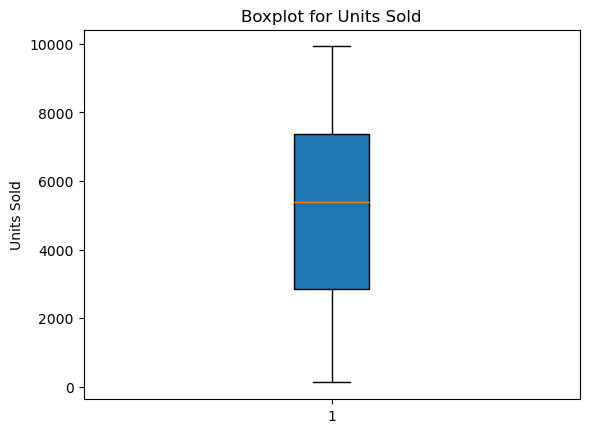

In [12]:
plt.boxplot(df['Units Sold'], vert=True, patch_artist=True)

plt.title('Boxplot for Units Sold')
plt.ylabel('Units Sold')


plt.show()


<Axes: ylabel='Frequency'>

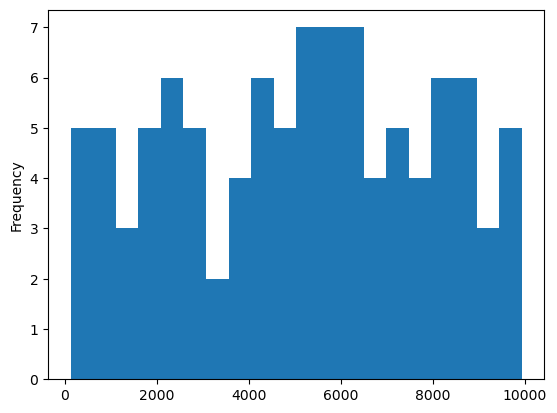

In [13]:
df['Units Sold'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

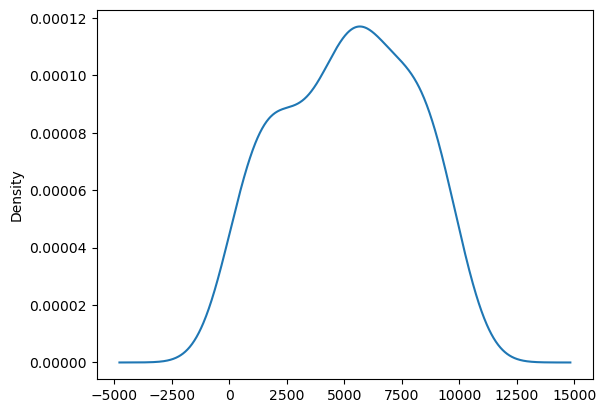

In [14]:
df['Units Sold'].plot(kind='kde')

## Unit Price

In [15]:
df['Unit Price'].describe()

count    100.000000
mean     276.761300
std      235.592241
min        9.330000
25%       81.730000
50%      179.880000
75%      437.200000
max      668.270000
Name: Unit Price, dtype: float64

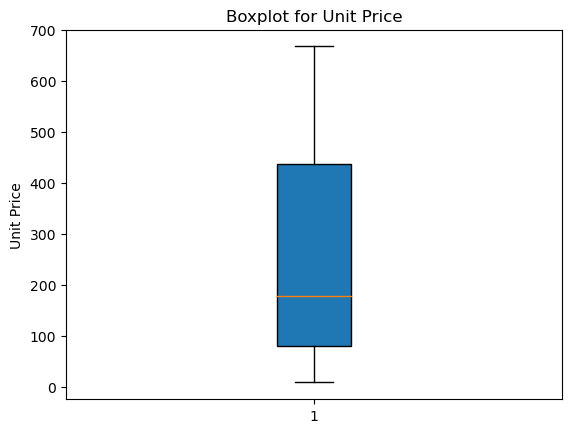

In [16]:
plt.boxplot(df['Unit Price'], vert=True, patch_artist=True)

plt.title('Boxplot for Unit Price')
plt.ylabel('Unit Price')


plt.show()

<Axes: ylabel='Frequency'>

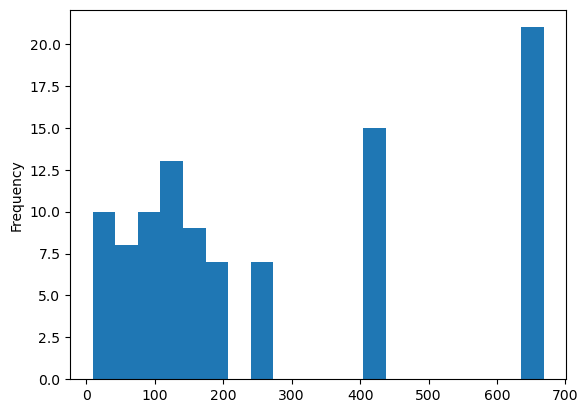

In [17]:
df['Unit Price'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

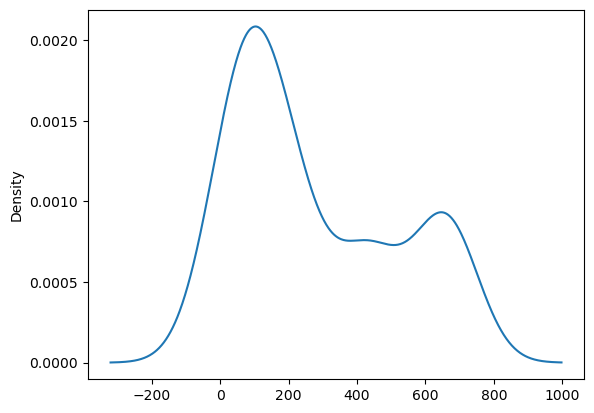

In [18]:
df['Unit Price'].plot(kind='kde')

Here we can see that "Unit Price" column is rightly skewed

### Unit Cost

In [19]:
df['Unit Cost'].describe()

count    100.000000
mean     191.048000
std      188.208181
min        6.920000
25%       35.840000
50%      107.275000
75%      263.330000
max      524.960000
Name: Unit Cost, dtype: float64

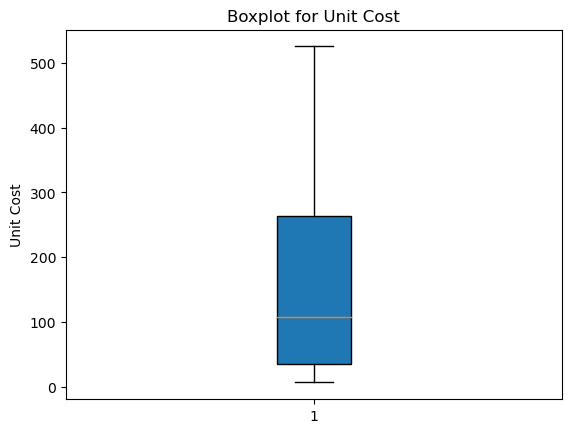

In [20]:
plt.boxplot(df['Unit Cost'], vert=True, patch_artist=True)

plt.title('Boxplot for Unit Cost')
plt.ylabel('Unit Cost')


plt.show()

<Axes: ylabel='Frequency'>

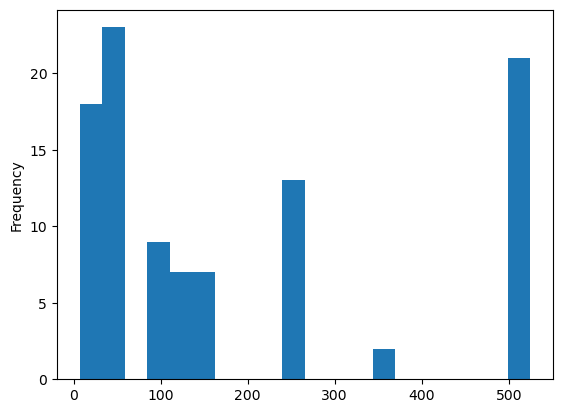

In [21]:
df['Unit Cost'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

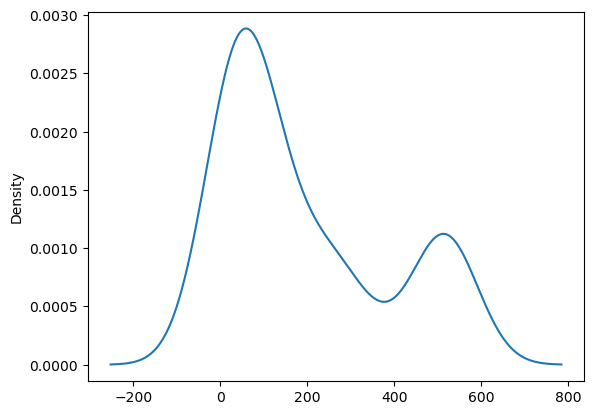

In [22]:
df['Unit Cost'].plot(kind='kde')

Here we can see that "Unit Cost" column is rightly skewed

### Total Revenue

In [23]:
df['Total Revenue'].describe()

count    1.000000e+02
mean     1.373488e+06
std      1.460029e+06
min      4.870260e+03
25%      2.687212e+05
50%      7.523144e+05
75%      2.212045e+06
max      5.997055e+06
Name: Total Revenue, dtype: float64

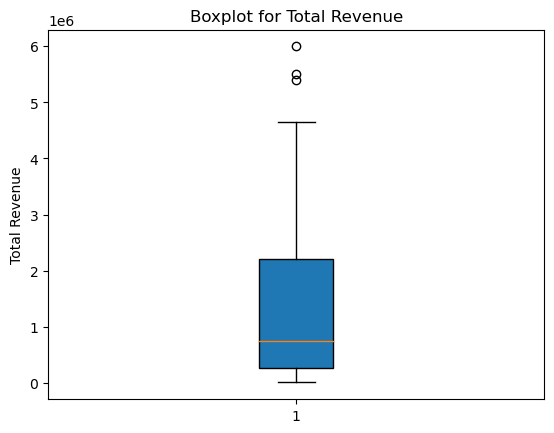

In [24]:
plt.boxplot(df['Total Revenue'], vert=True, patch_artist=True)

plt.title('Boxplot for Total Revenue')
plt.ylabel('Total Revenue')


plt.show()

<Axes: ylabel='Frequency'>

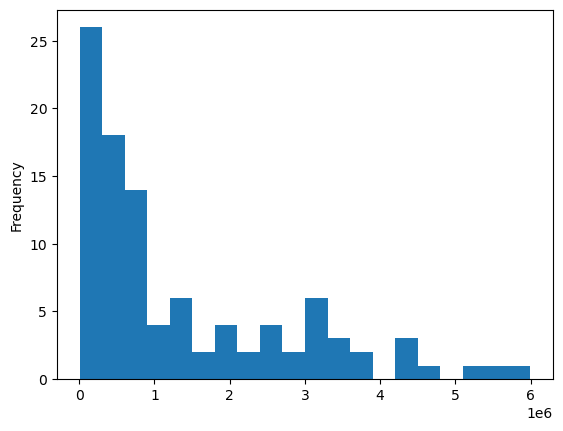

In [25]:
df['Total Revenue'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

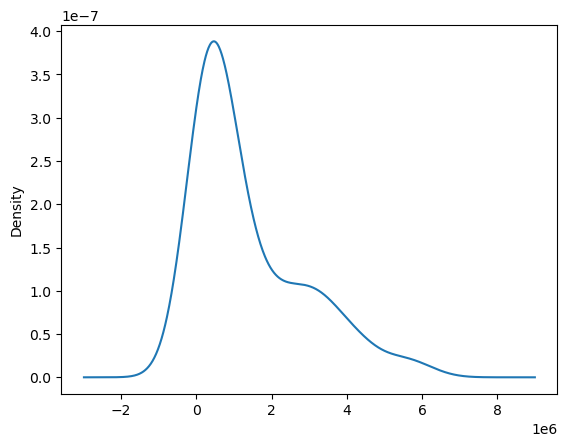

In [26]:
df['Total Revenue'].plot(kind='kde')

Here we can see that "Total Revenue" column is rightly skewed and have some outliers

### Total Profit 

In [27]:
df['Total Profit'].describe()

count    1.000000e+02
mean     4.416820e+05
std      4.385379e+05
min      1.258020e+03
25%      1.214436e+05
50%      2.907680e+05
75%      6.358288e+05
max      1.719922e+06
Name: Total Profit, dtype: float64

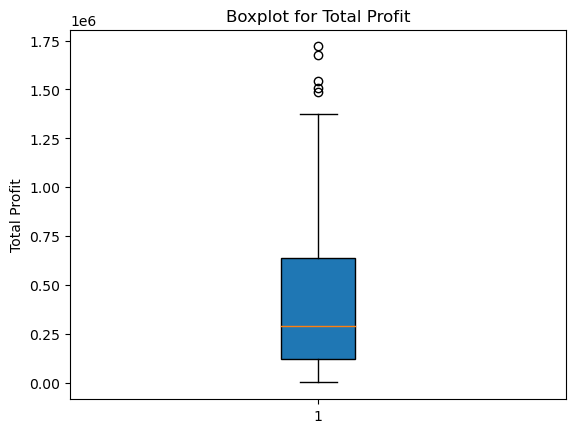

In [28]:
plt.boxplot(df['Total Profit'], vert=True, patch_artist=True)

plt.title('Boxplot for Total Profit')
plt.ylabel('Total Profit')


plt.show()

<Axes: ylabel='Frequency'>

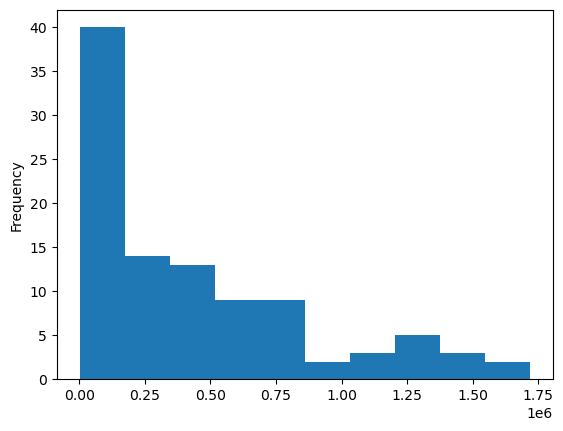

In [29]:
df['Total Profit'].plot(kind='hist')

<Axes: ylabel='Density'>

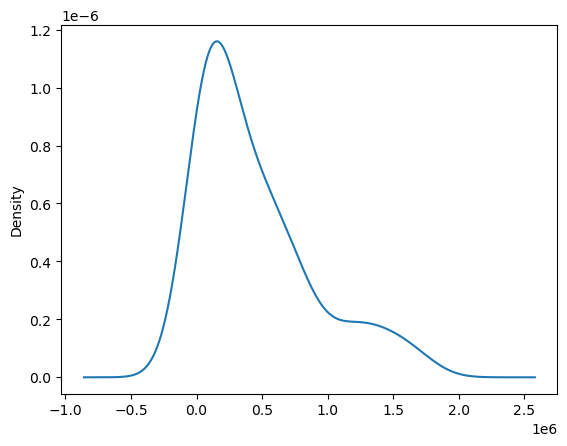

In [30]:
df['Total Profit'].plot(kind='kde')

Here we can see that "Total Profit" column is rightly skewed and have some outliers

### Total Cost

In [31]:
df['Total Cost'].describe()

count    1.000000e+02
mean     9.318057e+05
std      1.083938e+06
min      3.612240e+03
25%      1.688680e+05
50%      3.635664e+05
75%      1.613870e+06
max      4.509794e+06
Name: Total Cost, dtype: float64

<Axes: ylabel='Frequency'>

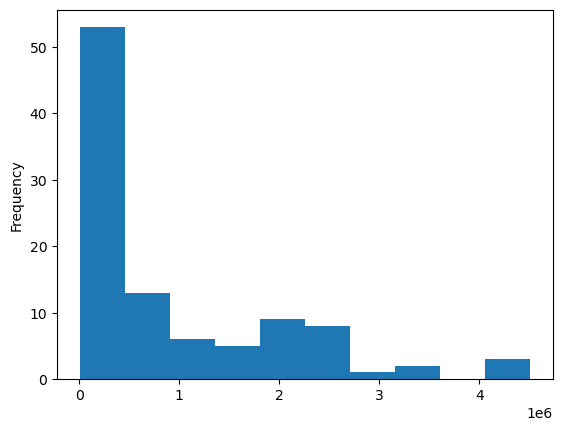

In [32]:
df['Total Cost'].plot(kind='hist')

<Axes: ylabel='Density'>

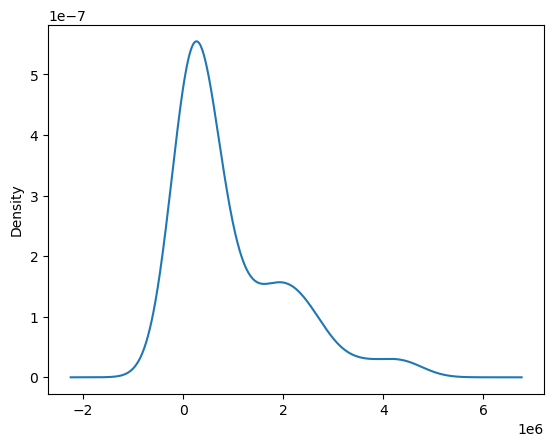

In [33]:
df['Total Cost'].plot(kind='kde')

Here we can see that "Total Cost" column is rightly skewed and have some outliers

# Univariate Analysis Of Categorical Data
### Region

In [34]:
df['Region'].value_counts()

Region
Sub-Saharan Africa                   36
Europe                               22
Australia and Oceania                11
Asia                                 11
Middle East and North Africa         10
Central America and the Caribbean     7
North America                         3
Name: count, dtype: int64

<Axes: xlabel='Region'>

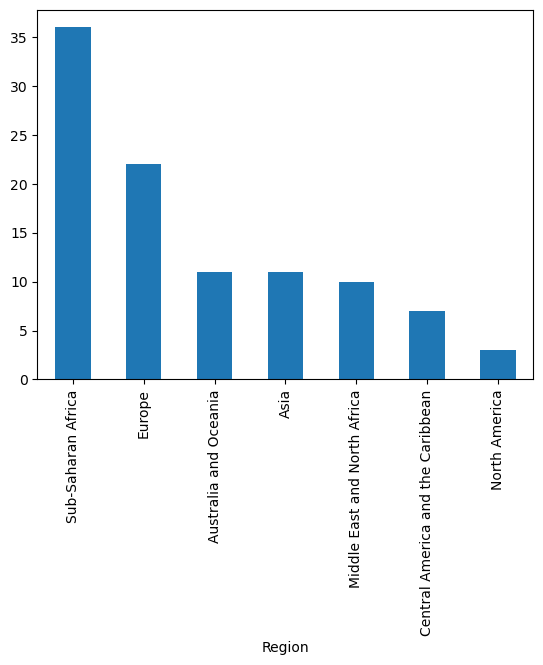

In [35]:
df['Region'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

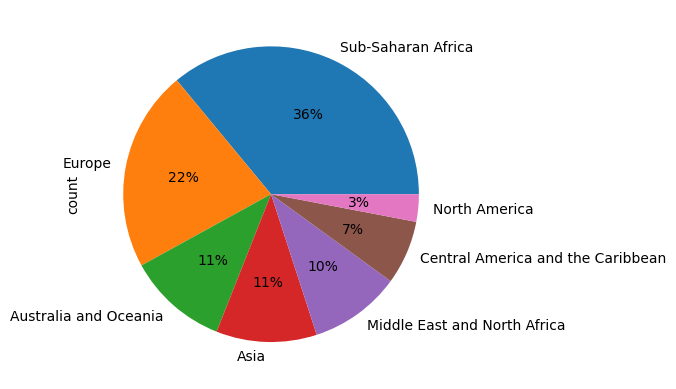

In [36]:
df['Region'].value_counts().plot(kind='pie',autopct='%0.0f%%')

### Country

In [37]:
df['Country'].value_counts()

Country
The Gambia               4
Sierra Leone             3
Sao Tome and Principe    3
Mexico                   3
Australia                3
                        ..
Comoros                  1
Iceland                  1
Macedonia                1
Mauritania               1
Mozambique               1
Name: count, Length: 76, dtype: int64

In [38]:
df['Country'].unique()

array(['Tuvalu', 'Grenada', 'Russia', 'Sao Tome and Principe', 'Rwanda',
       'Solomon Islands', 'Angola', 'Burkina Faso',
       'Republic of the Congo', 'Senegal', 'Kyrgyzstan', 'Cape Verde',
       'Bangladesh', 'Honduras', 'Mongolia', 'Bulgaria', 'Sri Lanka',
       'Cameroon', 'Turkmenistan', 'East Timor', 'Norway', 'Portugal',
       'New Zealand', 'Moldova ', 'France', 'Kiribati', 'Mali',
       'The Gambia', 'Switzerland', 'South Sudan', 'Australia', 'Myanmar',
       'Djibouti', 'Costa Rica', 'Syria', 'Brunei', 'Niger', 'Azerbaijan',
       'Slovakia', 'Comoros', 'Iceland', 'Macedonia', 'Mauritania',
       'Albania', 'Lesotho', 'Saudi Arabia', 'Sierra Leone',
       "Cote d'Ivoire", 'Fiji', 'Austria', 'United Kingdom', 'San Marino',
       'Libya', 'Haiti', 'Gabon', 'Belize', 'Lithuania', 'Madagascar',
       'Democratic Republic of the Congo', 'Pakistan', 'Mexico',
       'Federated States of Micronesia', 'Laos', 'Monaco', 'Samoa ',
       'Spain', 'Lebanon', 'Iran', 'Zamb

<Axes: xlabel='Country'>

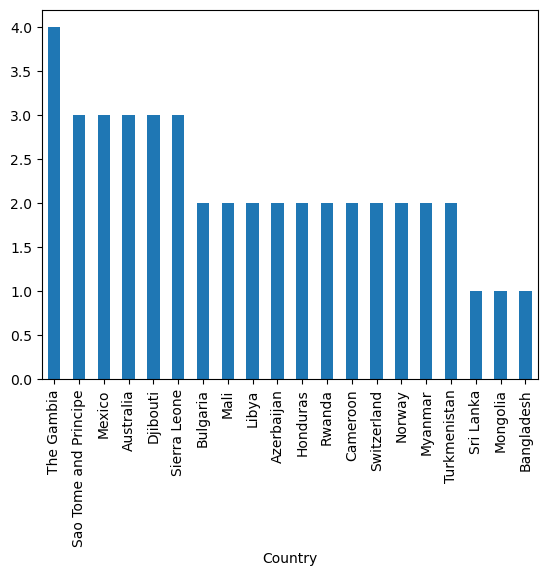

In [39]:
(df['Country'].value_counts().sort_values(ascending=False).head(20)).plot(kind='bar')

<Axes: ylabel='count'>

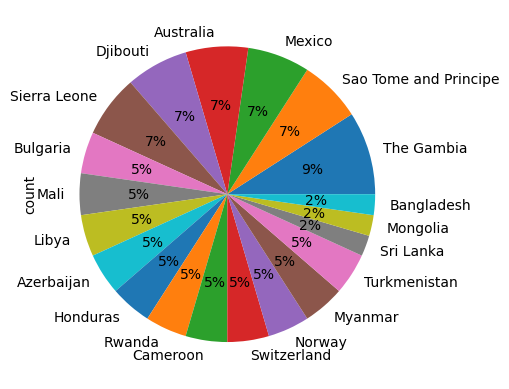

In [40]:
(df['Country'].value_counts().sort_values(ascending=False).head(20)).plot(kind='pie',autopct='%0.0f%%')

### Item Type

In [41]:
df['Item Type'].value_counts()

Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

<Axes: xlabel='Item Type'>

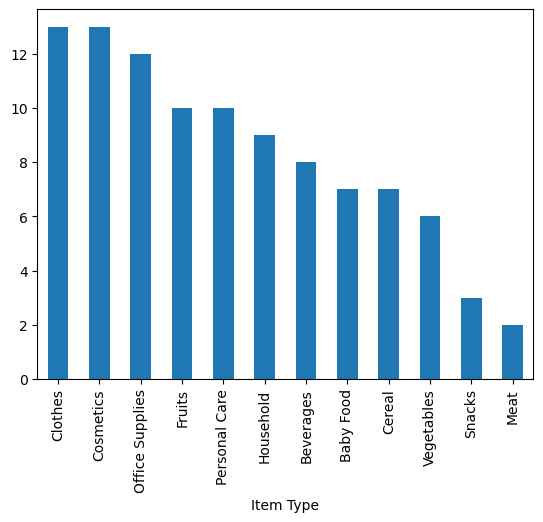

In [42]:
df['Item Type'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

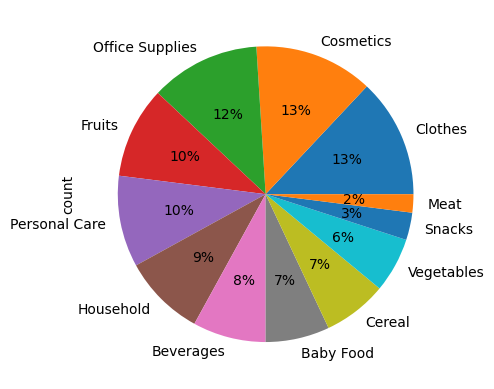

In [43]:
df['Item Type'].value_counts().plot(kind='pie',autopct='%0.0f%%')

### Sales Channel

In [44]:
df['Sales Channel'].value_counts()

Sales Channel
Offline    50
Online     50
Name: count, dtype: int64

<Axes: ylabel='count'>

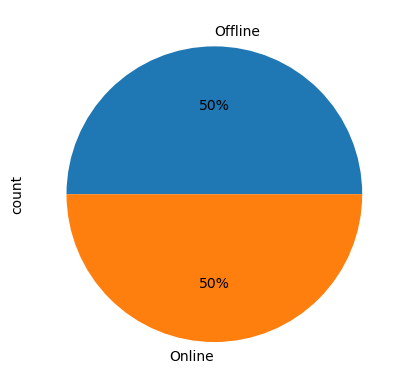

In [45]:
df['Sales Channel'].value_counts().plot(kind='pie',autopct='%0.0f%%')

### Order Priority

In [46]:
df['Order Priority'].value_counts()

Order Priority
H    30
L    27
C    22
M    21
Name: count, dtype: int64

<Axes: xlabel='Order Priority'>

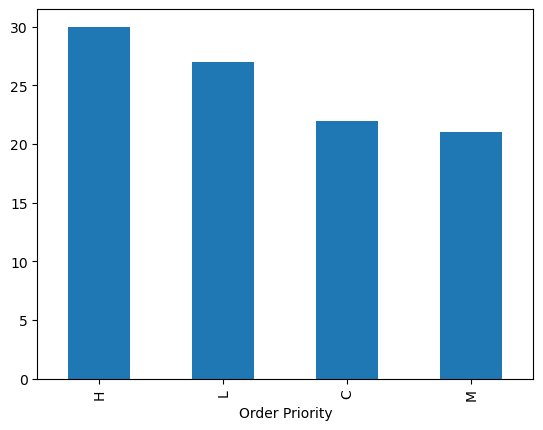

In [47]:
df['Order Priority'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

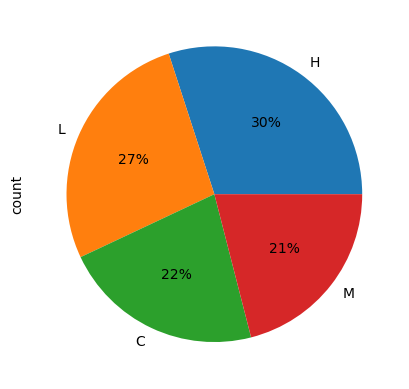

In [48]:
df['Order Priority'].value_counts().plot(kind='pie',autopct='%0.0f%%')

## Bivariate Analysis

## Numerical data vs Numerical data
### units sold vs unit price

In [49]:
df['Units Sold'].corr(df['Unit Price'])

-0.07048558682925853

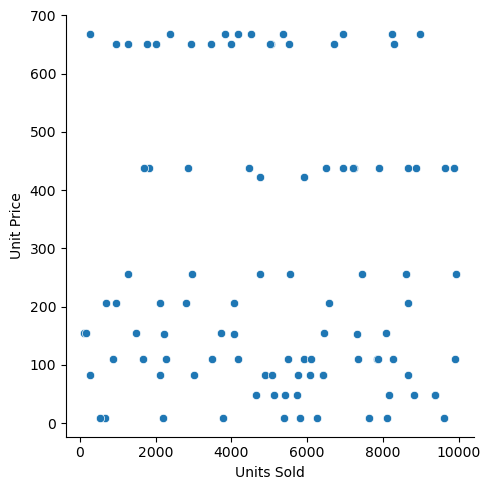

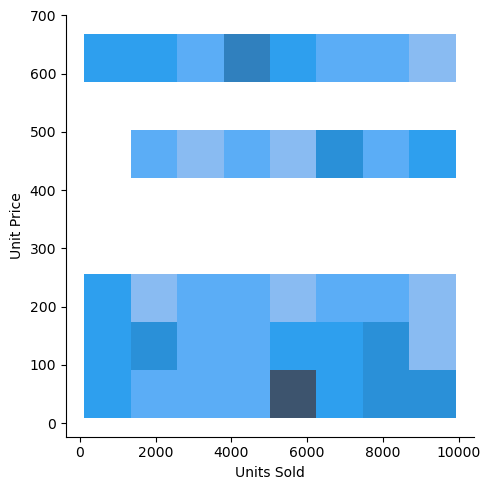

In [50]:
sns.relplot(data=df,x='Units Sold',y='Unit Price',kind='scatter')
sns.displot(data=df,x='Units Sold',y='Unit Price',kind='hist')

### units sold vs unit cost

In [51]:
df['Units Sold'].corr(df['Unit Cost'])

-0.09223244633531226

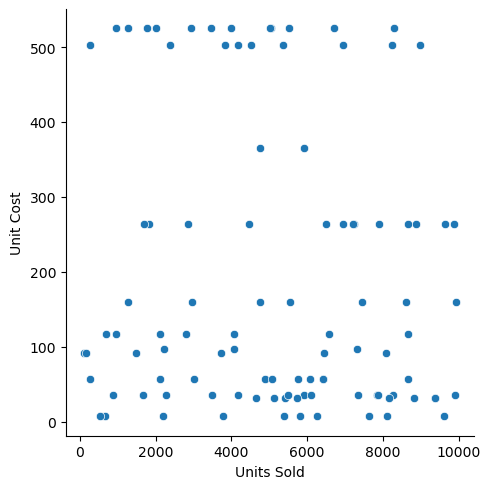

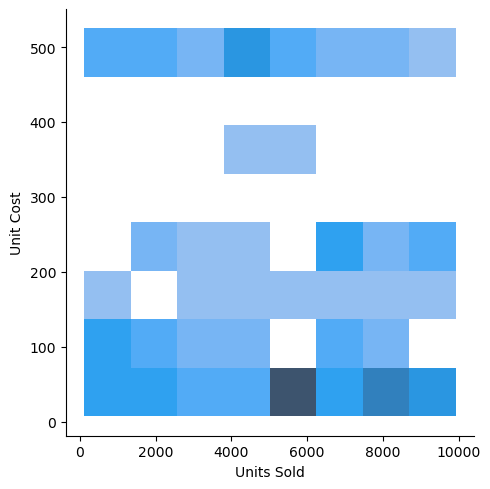

In [52]:
sns.relplot(data=df,x='Units Sold',y='Unit Cost',kind='scatter')
sns.displot(data=df,x='Units Sold',y='Unit Cost',kind='hist')

### units sold vs total revenue

In [53]:
df['Units Sold'].corr(df['Total Revenue'])

0.4477844902616836

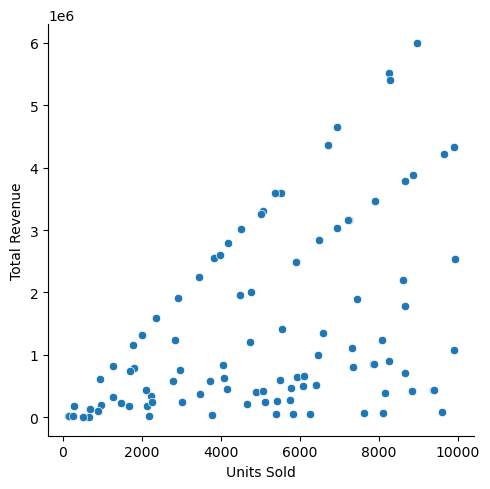

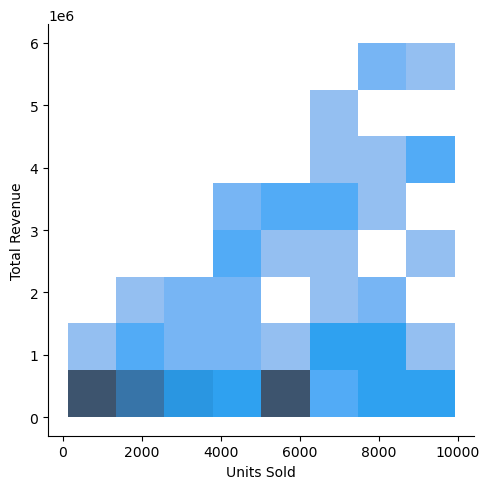

In [54]:
sns.relplot(data=df,x='Units Sold',y='Total Revenue',kind='scatter')
sns.displot(data=df,x='Units Sold',y='Total Revenue',kind='hist')

### units sold vs total cost

In [55]:
df['Units Sold'].corr(df['Total Cost'])

0.3747459150557474

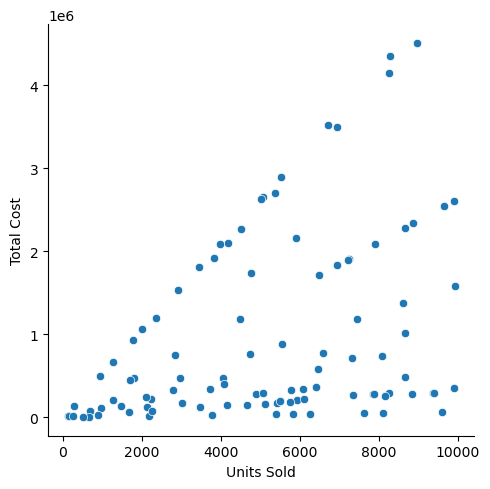

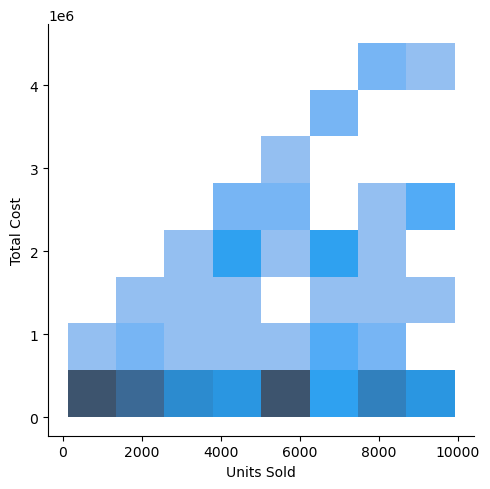

In [56]:
sns.relplot(data=df,x='Units Sold',y='Total Cost',kind='scatter')
sns.displot(data=df,x='Units Sold',y='Total Cost',kind='hist')

### units sold vs total profit

In [57]:
df['Units Sold'].corr(df['Total Profit'])

0.5645504620845976

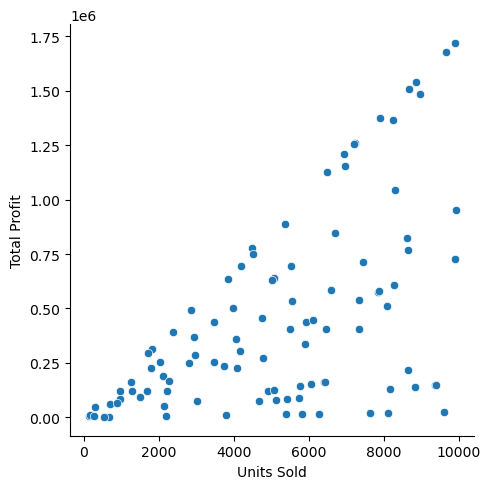

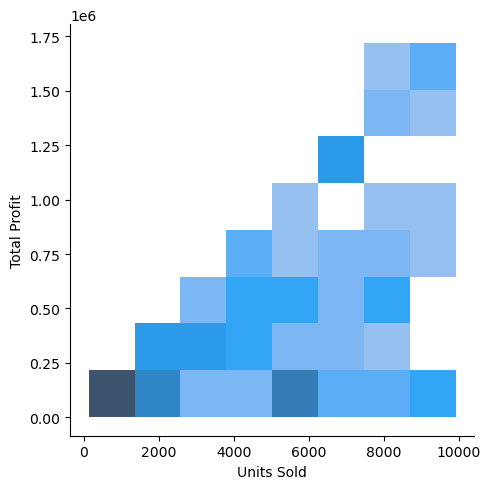

In [58]:
sns.relplot(data=df,x='Units Sold',y='Total Profit',kind='scatter')
sns.displot(data=df,x='Units Sold',y='Total Profit',kind='hist')

# Bivariate Analysis
### categorical data vs categorical data
### region vs country

In [59]:
pd.crosstab(df['Region'],df['Country'])

Country,Albania,Angola,Australia,Austria,Azerbaijan,Bangladesh,Belize,Brunei,Bulgaria,Burkina Faso,...,South Sudan,Spain,Sri Lanka,Switzerland,Syria,The Gambia,Turkmenistan,Tuvalu,United Kingdom,Zambia
Region,,,,,,,,,,,,,,,,,,,,,
Asia,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,2,0,0,0
Australia and Oceania,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Central America and the Caribbean,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Europe,1,0,0,1,0,0,0,0,2,0,...,0,1,0,2,0,0,0,0,1,0
Middle East and North Africa,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
North America,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sub-Saharan Africa,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,4,0,0,0,1


<Axes: xlabel='Region', ylabel='Country'>

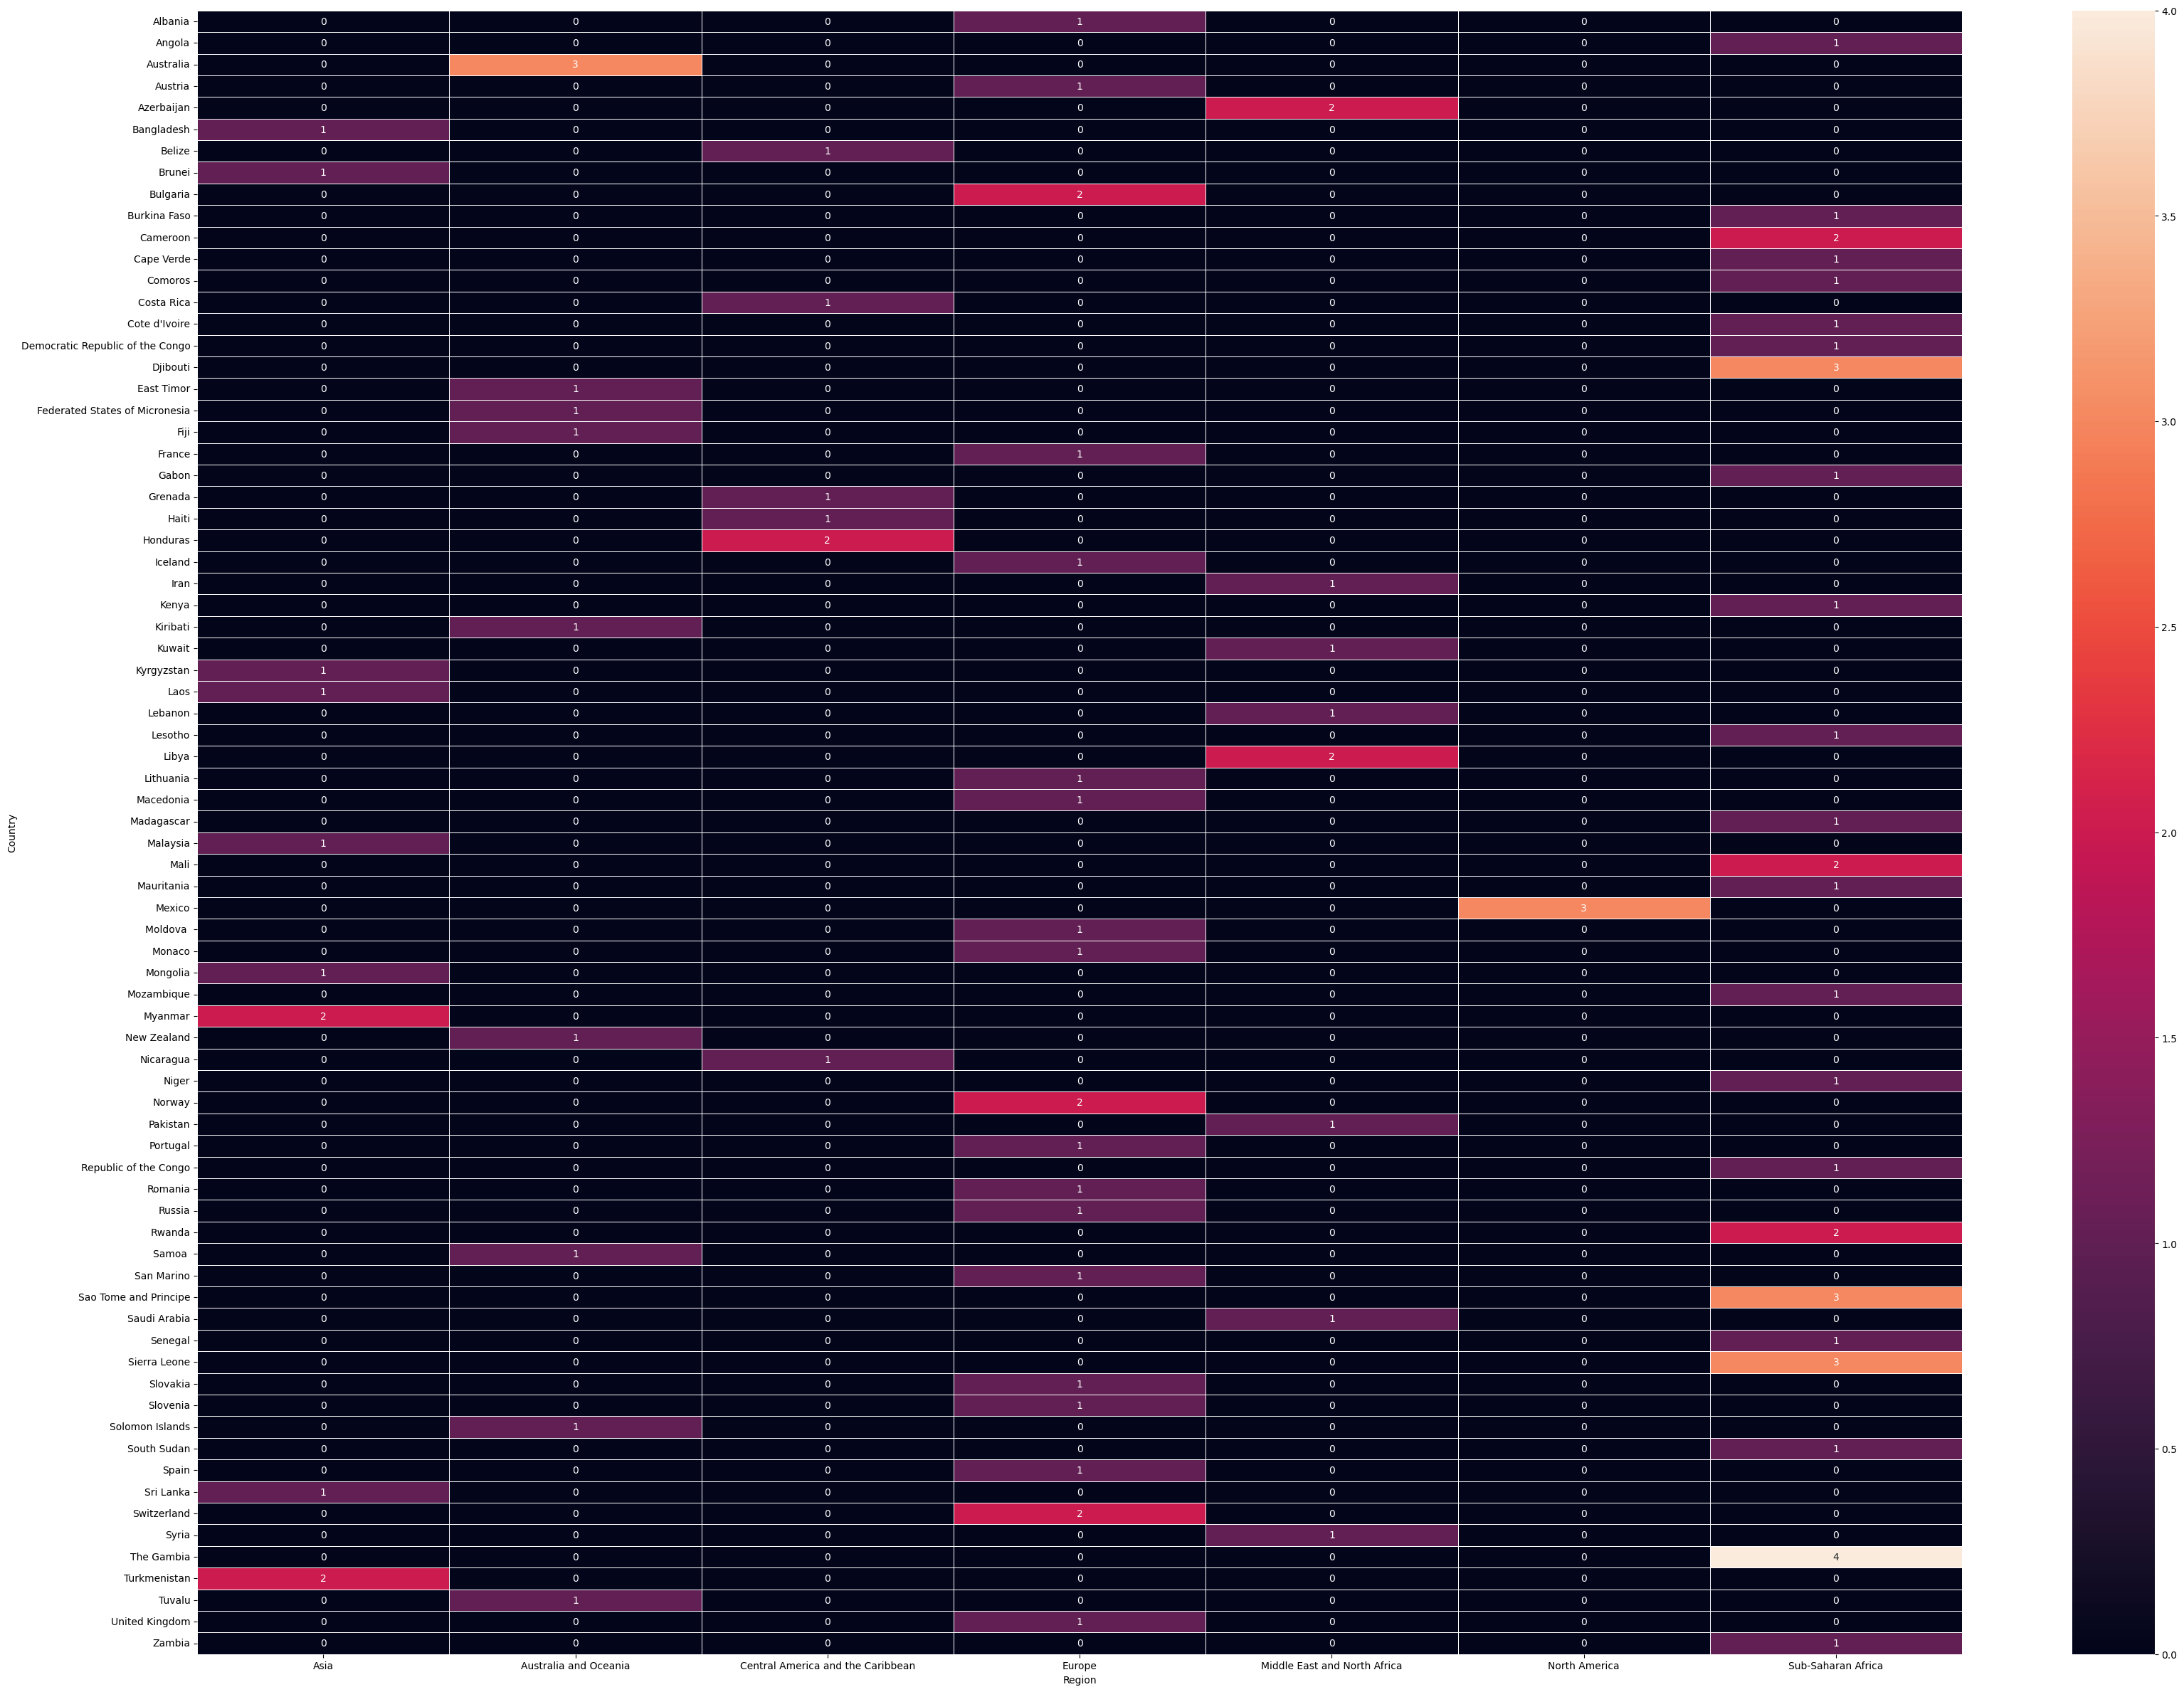

In [60]:
plt.figure(figsize=(40,30))
sns.heatmap(pd.crosstab(df['Country'],df['Region']),linewidth=0.5,annot=True)

### region vs item type

In [61]:
pd.crosstab(df['Region'],df['Item Type'],normalize='columns')*100

Item Type,Baby Food,Beverages,Cereal,Clothes,Cosmetics,Fruits,Household,Meat,Office Supplies,Personal Care,Snacks,Vegetables
Region,,,,,,,,,,,,
Asia,0.000000,0.0,0.000000,15.384615,7.692308,10.0,22.222222,0.0,16.666667,10.0,0.000000,33.333333
Australia and Oceania,28.571429,25.0,14.285714,7.692308,7.692308,20.0,0.000000,50.0,8.333333,0.0,0.000000,0.000000
Central America and the Caribbean,0.000000,12.5,14.285714,7.692308,7.692308,0.0,11.111111,0.0,0.000000,10.0,33.333333,0.000000
Europe,57.142857,25.0,0.000000,23.076923,38.461538,0.0,22.222222,0.0,25.000000,20.0,0.000000,16.666667
Middle East and North Africa,0.000000,0.0,14.285714,15.384615,23.076923,30.0,0.000000,0.0,8.333333,0.0,0.000000,0.000000
North America,0.000000,0.0,0.000000,0.000000,0.000000,0.0,11.111111,0.0,0.000000,20.0,0.000000,0.000000
Sub-Saharan Africa,14.285714,37.5,57.142857,30.769231,15.384615,40.0,33.333333,50.0,41.666667,40.0,66.666667,50.000000


<Axes: xlabel='Item Type', ylabel='Region'>

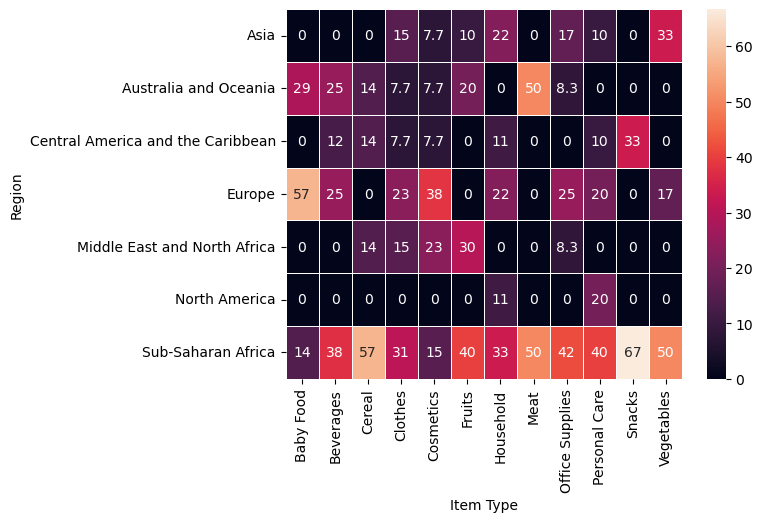

In [62]:
sns.heatmap(pd.crosstab(df['Region'],df['Item Type'],normalize='columns')*100,linewidth=0.5,annot=True)

### region vs sales channel

In [63]:
pd.crosstab(df['Region'],df['Sales Channel'],normalize='columns')*100

Sales Channel,Offline,Online
Region,,
Asia,12.0,10.0
Australia and Oceania,8.0,14.0
Central America and the Caribbean,10.0,4.0
Europe,18.0,26.0
Middle East and North Africa,4.0,16.0
North America,6.0,0.0
Sub-Saharan Africa,42.0,30.0


<Axes: xlabel='Sales Channel', ylabel='Region'>

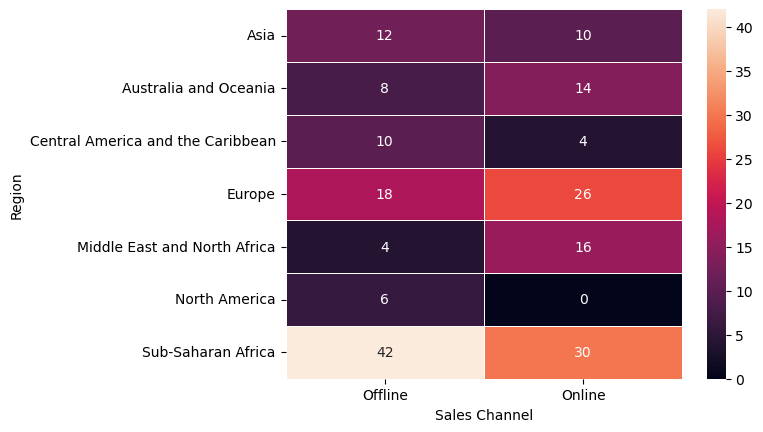

In [64]:
sns.heatmap(pd.crosstab(df['Region'],df['Sales Channel'],normalize='columns')*100,linewidth=0.5,annot=True)

### region vs order priority

In [65]:
pd.crosstab(df['Region'],df['Order Priority'],normalize='columns')*100

Order Priority,C,H,L,M
Region,,,,
Asia,9.090909,10.000000,14.814815,9.523810
Australia and Oceania,18.181818,16.666667,3.703704,4.761905
Central America and the Caribbean,9.090909,6.666667,7.407407,4.761905
Europe,22.727273,23.333333,22.222222,19.047619
Middle East and North Africa,0.000000,6.666667,14.814815,19.047619
North America,4.545455,0.000000,3.703704,4.761905
Sub-Saharan Africa,36.363636,36.666667,33.333333,38.095238


<Axes: xlabel='Order Priority', ylabel='Region'>

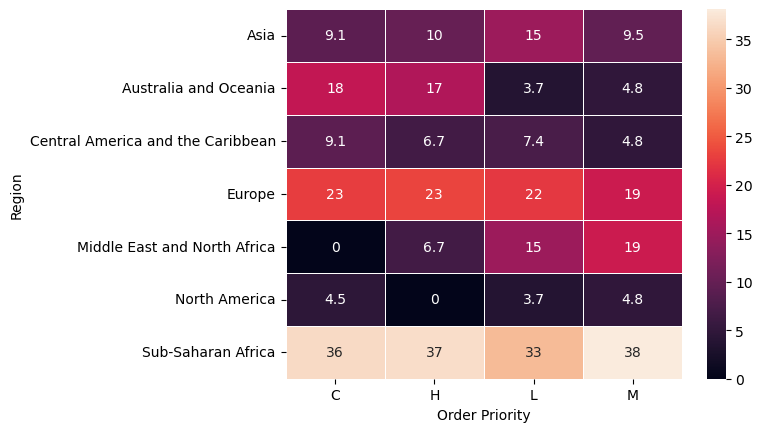

In [66]:
sns.heatmap(pd.crosstab(df['Region'],df['Order Priority'],normalize='columns')*100,linewidth=0.5,annot=True)

### item type vs sales channel

In [67]:
pd.crosstab(df['Item Type'],df['Sales Channel'],normalize='columns')*100

Sales Channel,Offline,Online
Item Type,,
Baby Food,6.0,8.0
Beverages,12.0,4.0
Cereal,6.0,8.0
Clothes,12.0,14.0
Cosmetics,14.0,12.0
Fruits,4.0,16.0
Household,16.0,2.0
Meat,0.0,4.0
Office Supplies,12.0,12.0


<Axes: xlabel='Sales Channel', ylabel='Item Type'>

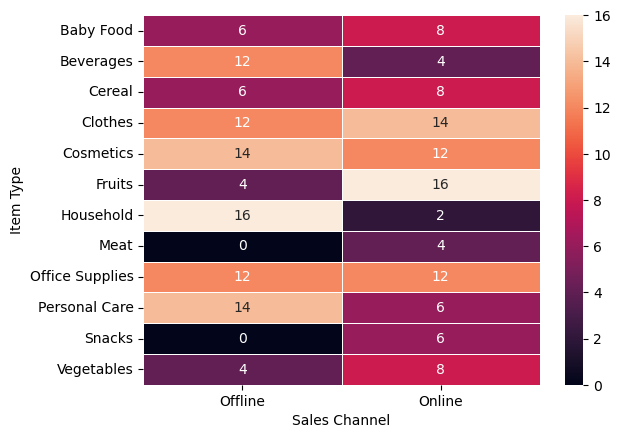

In [68]:
sns.heatmap(pd.crosstab(df['Item Type'],df['Sales Channel'],normalize='columns')*100,linewidth=0.5,annot=True)

### item type vs order priority

In [69]:
pd.crosstab(df['Item Type'],df['Order Priority'],normalize='columns')*100

Order Priority,C,H,L,M
Item Type,,,,
Baby Food,4.545455,10.000000,7.407407,4.761905
Beverages,31.818182,3.333333,0.000000,0.000000
Cereal,4.545455,16.666667,0.000000,4.761905
Clothes,18.181818,10.000000,11.111111,14.285714
Cosmetics,4.545455,26.666667,3.703704,14.285714
Fruits,4.545455,6.666667,18.518519,9.523810
Household,4.545455,6.666667,18.518519,4.761905
Meat,0.000000,0.000000,3.703704,4.761905
Office Supplies,9.090909,6.666667,11.111111,23.809524


<Axes: xlabel='Order Priority', ylabel='Item Type'>

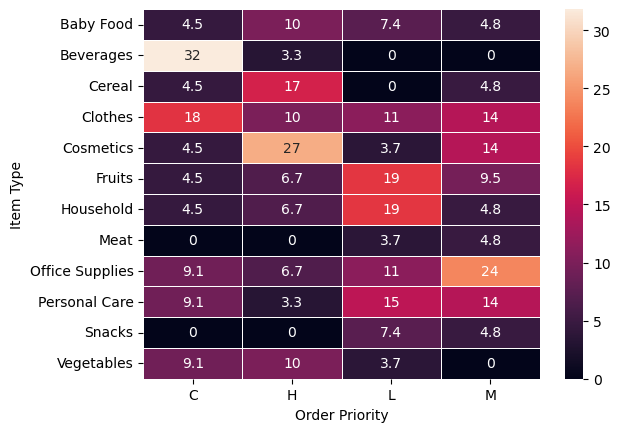

In [70]:
sns.heatmap(pd.crosstab(df['Item Type'],df['Order Priority'],normalize='columns')*100,linewidth=0.5,annot=True)

### sales channel vs order priority

In [71]:
pd.crosstab(df['Sales Channel'],df['Order Priority'],normalize='columns')*100

Order Priority,C,H,L,M
Sales Channel,,,,
Offline,59.090909,56.666667,44.444444,38.095238
Online,40.909091,43.333333,55.555556,61.904762


<Axes: xlabel='Order Priority', ylabel='Sales Channel'>

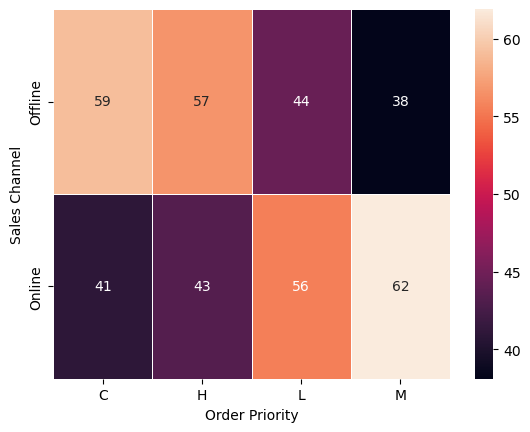

In [72]:
sns.heatmap(pd.crosstab(df['Sales Channel'],df['Order Priority'],normalize='columns')*100,linewidth=0.5,annot=True)

# Bivariate Analysis
### Numerical data vs Categorical data
### region vs units sold

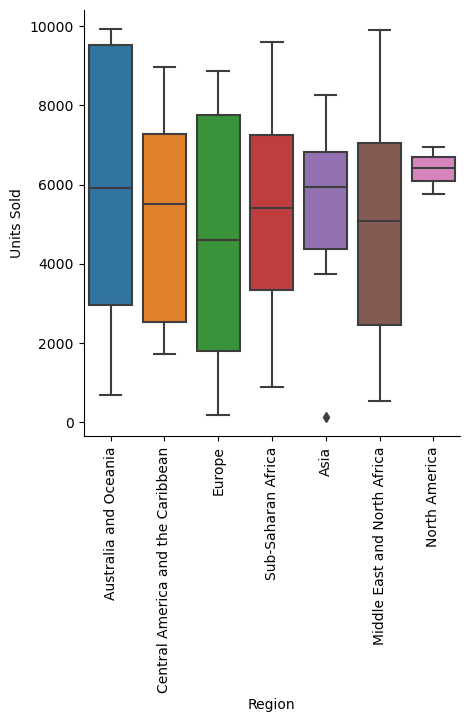

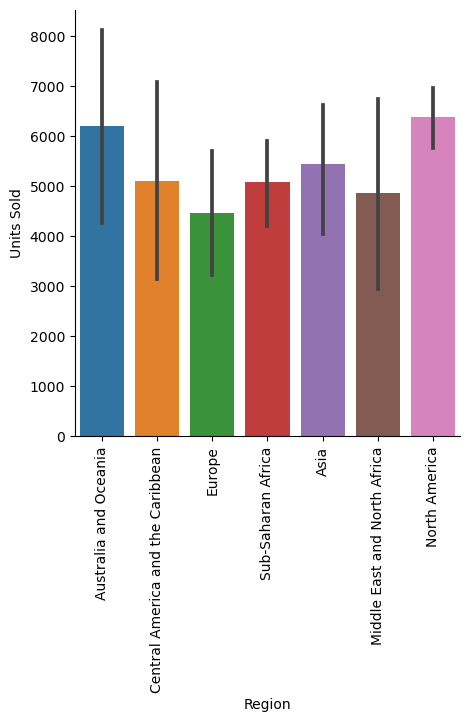

In [73]:
x=sns.catplot(data=df,x='Region',y='Units Sold',kind='box')
y=sns.catplot(data=df,x='Region',y='Units Sold',kind='bar')
x.set_xticklabels(rotation=90)
y.set_xticklabels(rotation=90)

### region vs unit price

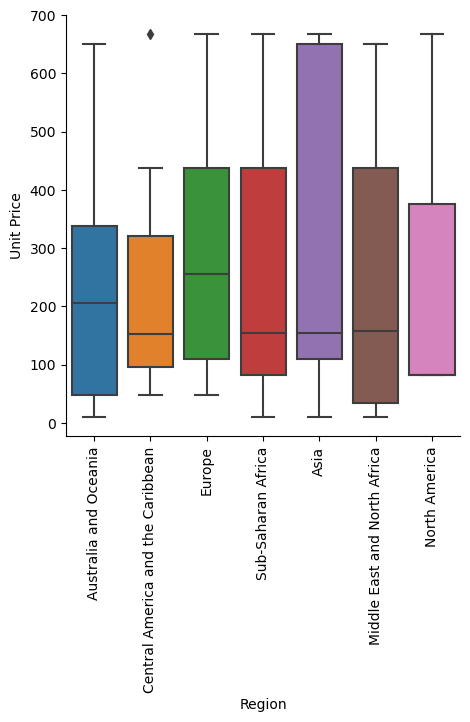

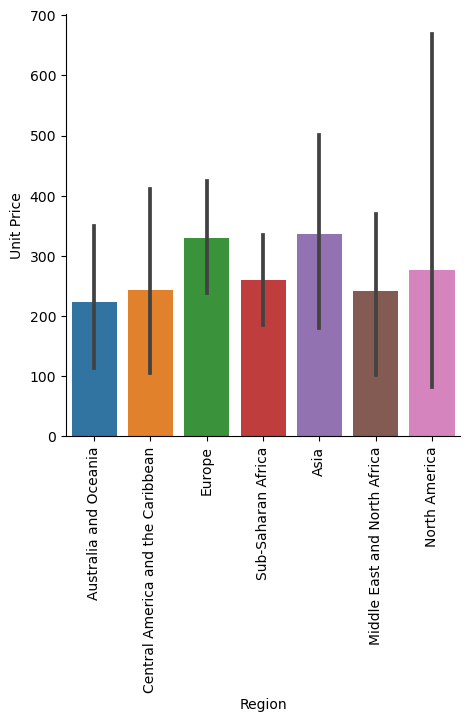

In [74]:
x=sns.catplot(data=df,x='Region',y='Unit Price',kind='box')
y=sns.catplot(data=df,x='Region',y='Unit Price',kind='bar')
x.set_xticklabels(rotation=90)
y.set_xticklabels(rotation=90)

### region vs unit cost

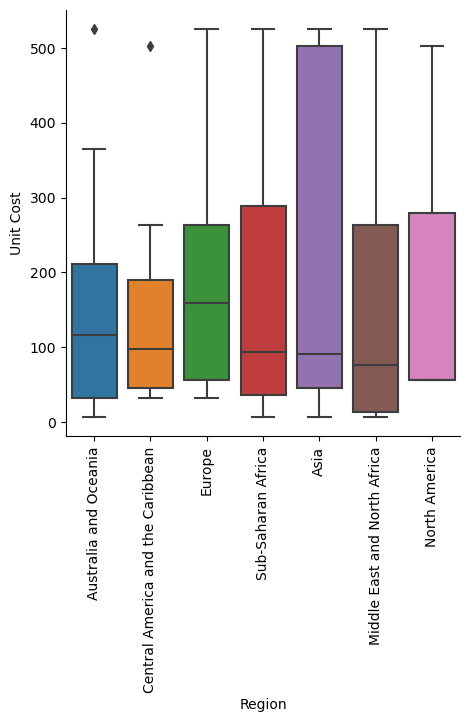

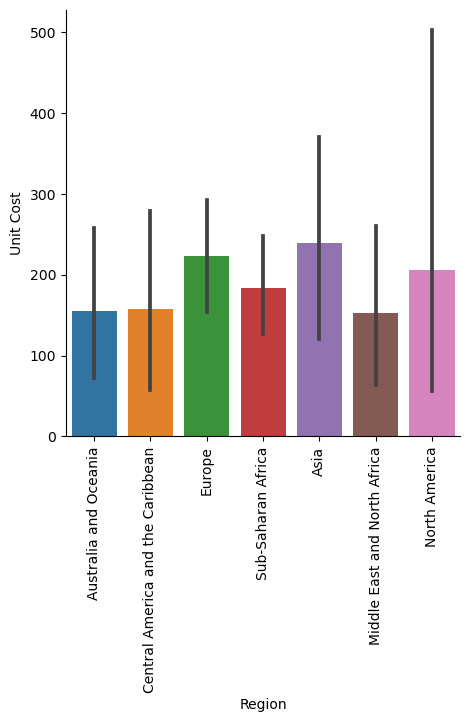

In [75]:
x=sns.catplot(data=df,x='Region',y='Unit Cost',kind='box')
y=sns.catplot(data=df,x='Region',y='Unit Cost',kind='bar')
x.set_xticklabels(rotation=90)
y.set_xticklabels(rotation=90)

### region vs total revenue

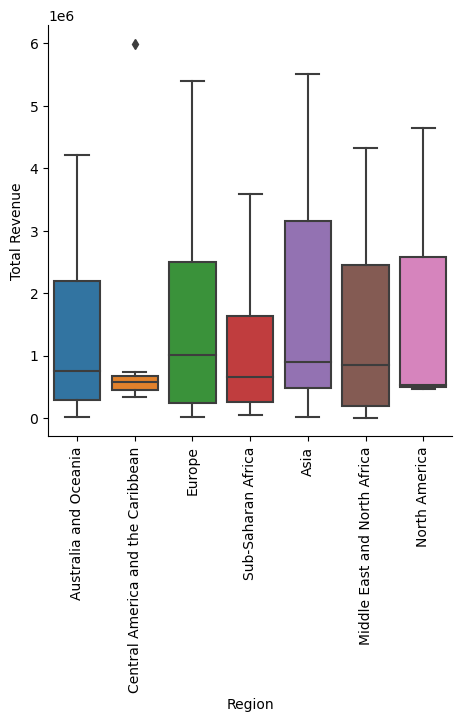

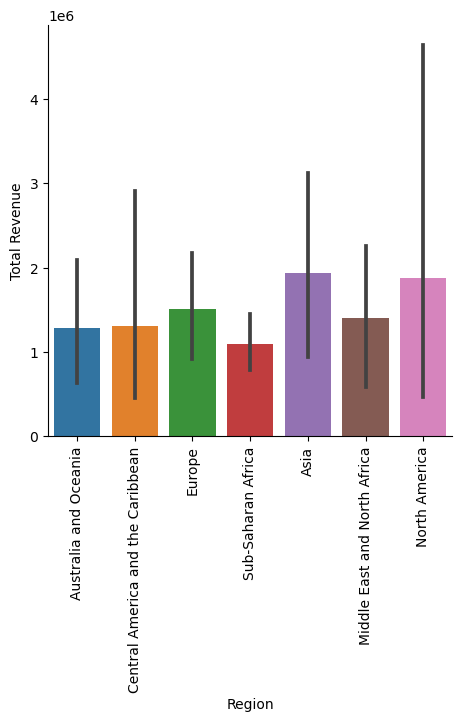

In [76]:
x=sns.catplot(data=df,x='Region',y='Total Revenue',kind='box')
y=sns.catplot(data=df,x='Region',y='Total Revenue',kind='bar')
x.set_xticklabels(rotation=90)
y.set_xticklabels(rotation=90)

### region vs total cost

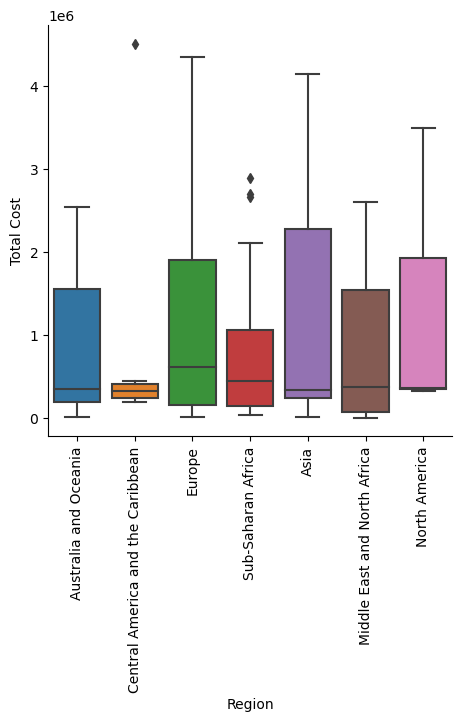

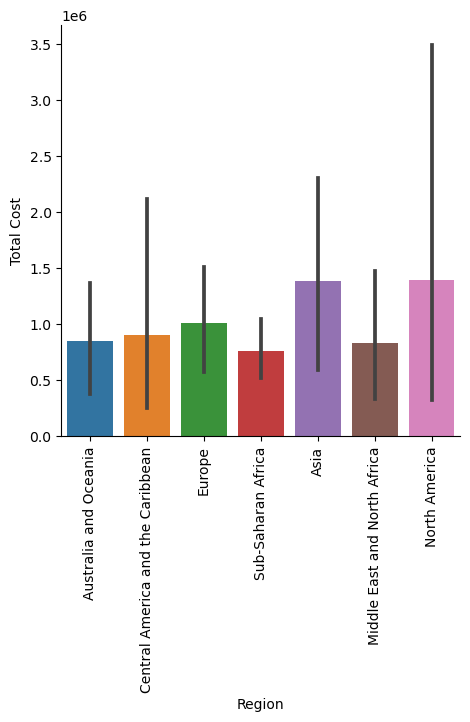

In [77]:
x=sns.catplot(data=df,x='Region',y='Total Cost',kind='box')
y=sns.catplot(data=df,x='Region',y='Total Cost',kind='bar')
x.set_xticklabels(rotation=90)
y.set_xticklabels(rotation=90)

### region vs total profit

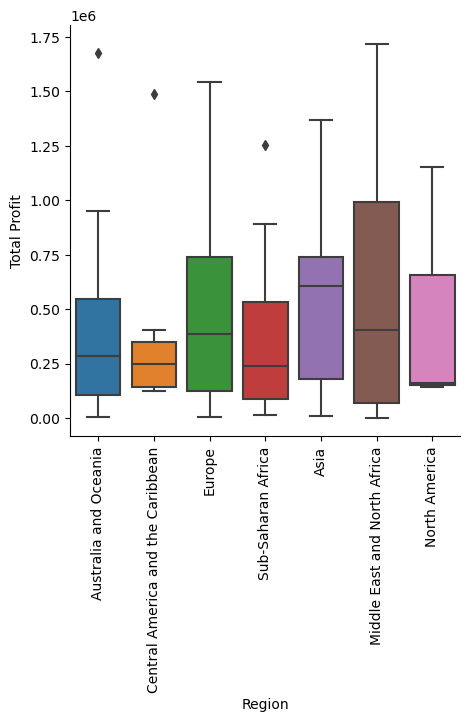

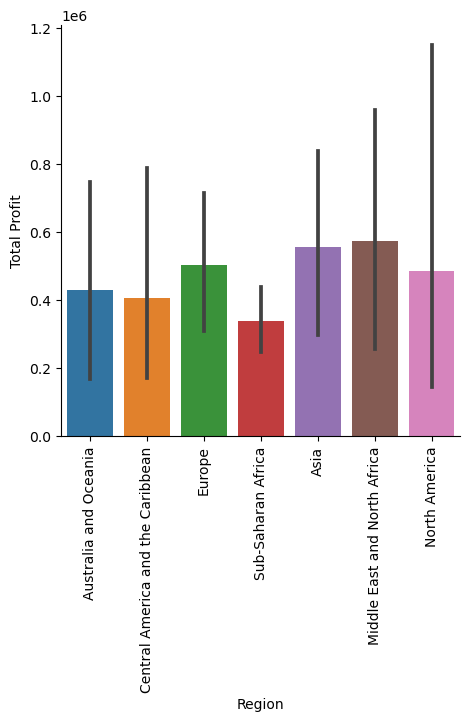

In [78]:
x=sns.catplot(data=df,x='Region',y='Total Profit',kind='box')
y=sns.catplot(data=df,x='Region',y='Total Profit',kind='bar')
x.set_xticklabels(rotation=90)
y.set_xticklabels(rotation=90)

###  item type vs units sold

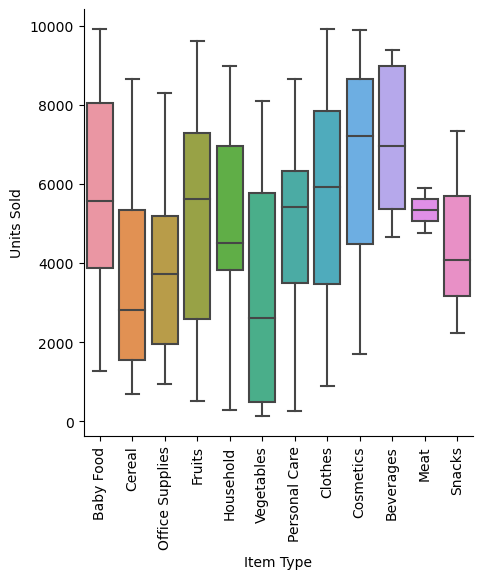

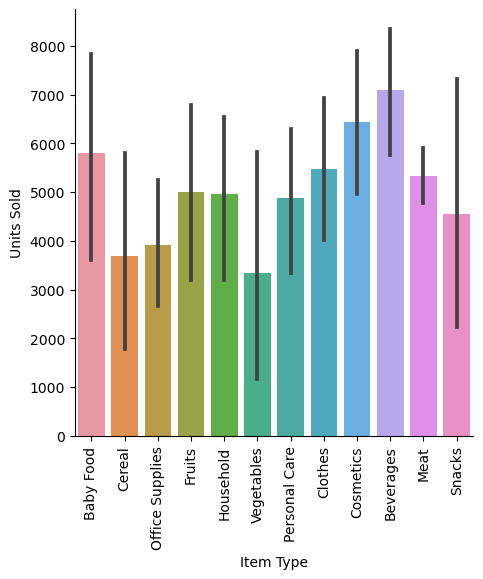

In [79]:
x=sns.catplot(data=df,x='Item Type',y='Units Sold',kind='box')
y=sns.catplot(data=df,x='Item Type',y='Units Sold',kind='bar')
x.set_xticklabels(rotation=90)
y.set_xticklabels(rotation=90)

### item type vs unit price

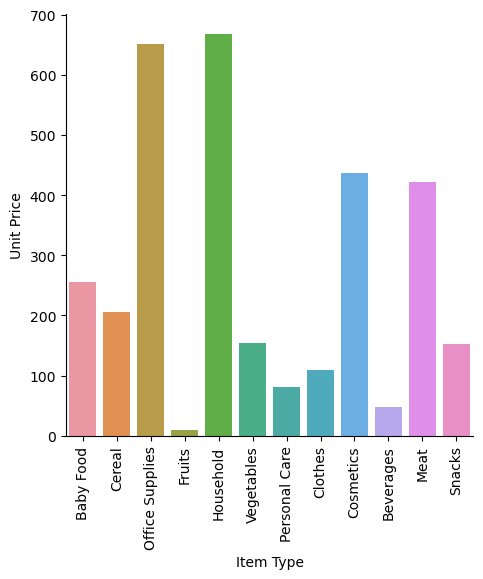

In [80]:
y=sns.catplot(data=df,x='Item Type',y='Unit Price',kind='bar')
y.set_xticklabels(rotation=90)

### item type vs unit cost

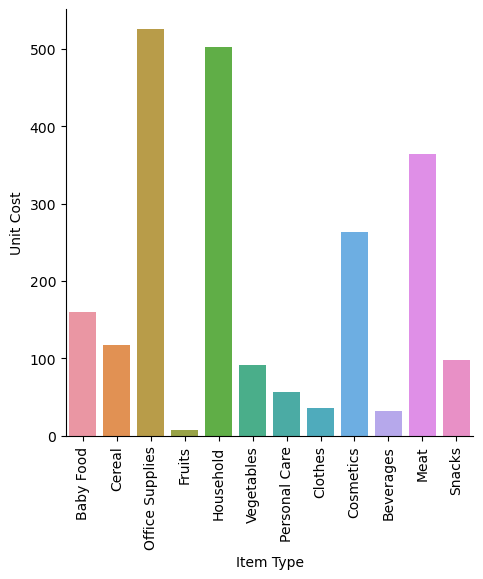

In [81]:
y=sns.catplot(data=df,x='Item Type',y='Unit Cost',kind='bar')
y.set_xticklabels(rotation=90)

### item type vs total revenue

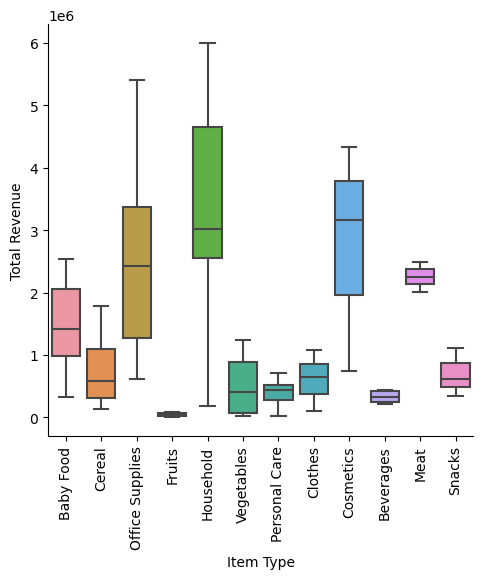

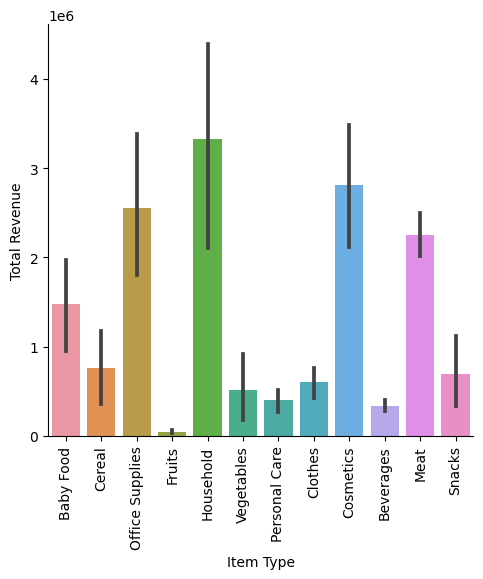

In [82]:
x=sns.catplot(data=df,x='Item Type',y='Total Revenue',kind='box')
y=sns.catplot(data=df,x='Item Type',y='Total Revenue',kind='bar')
x.set_xticklabels(rotation=90)
y.set_xticklabels(rotation=90)

### item type vs total cost

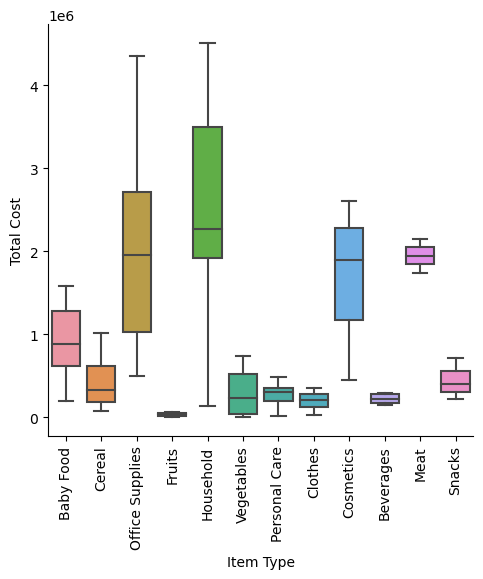

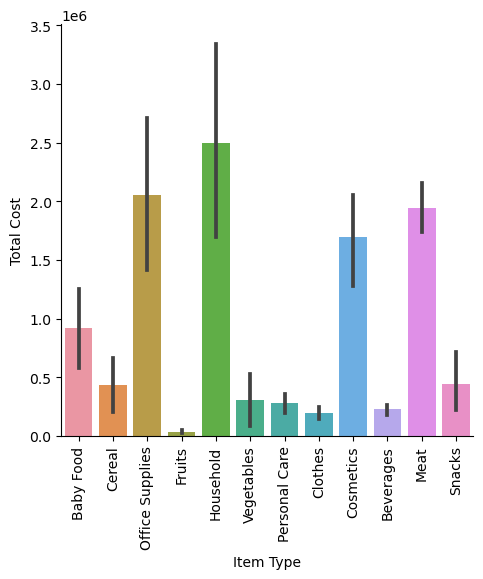

In [83]:
x=sns.catplot(data=df,x='Item Type',y='Total Cost',kind='box')
y=sns.catplot(data=df,x='Item Type',y='Total Cost',kind='bar')
x.set_xticklabels(rotation=90)
y.set_xticklabels(rotation=90)

### item type vs total profit

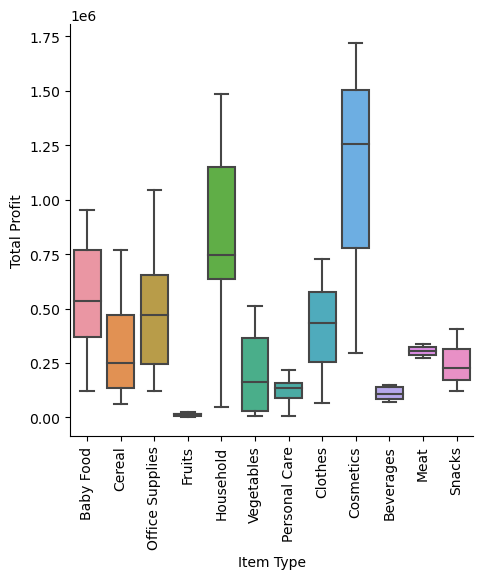

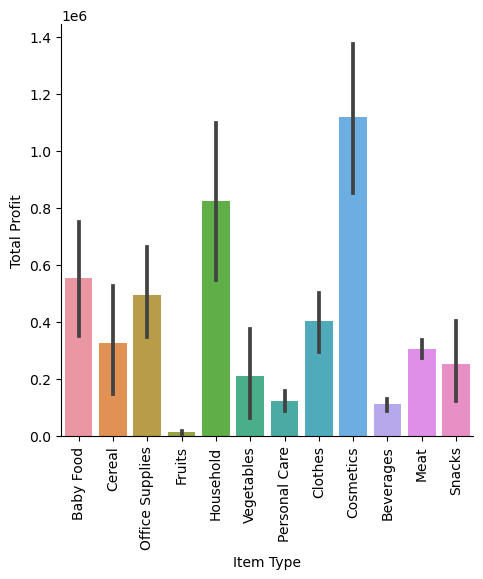

In [84]:
x=sns.catplot(data=df,x='Item Type',y='Total Profit',kind='box')
y=sns.catplot(data=df,x='Item Type',y='Total Profit',kind='bar')
x.set_xticklabels(rotation=90)
y.set_xticklabels(rotation=90)

### sales channel vs units sold

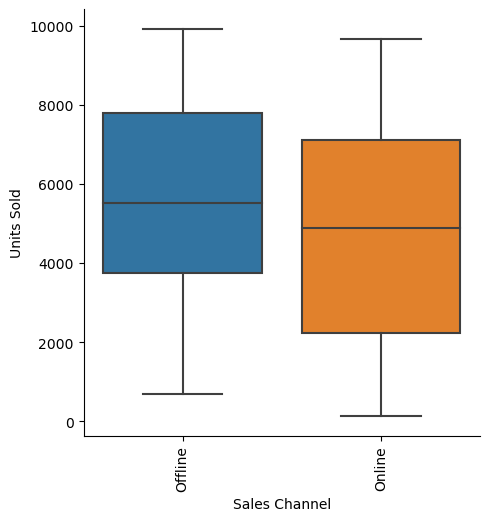

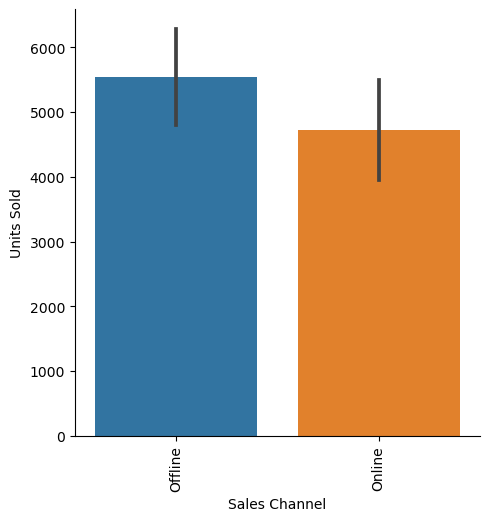

In [85]:
x=sns.catplot(data=df,x='Sales Channel',y='Units Sold',kind='box')
y=sns.catplot(data=df,x='Sales Channel',y='Units Sold',kind='bar')
x.set_xticklabels(rotation=90)
y.set_xticklabels(rotation=90)

### sales channel vs unit price

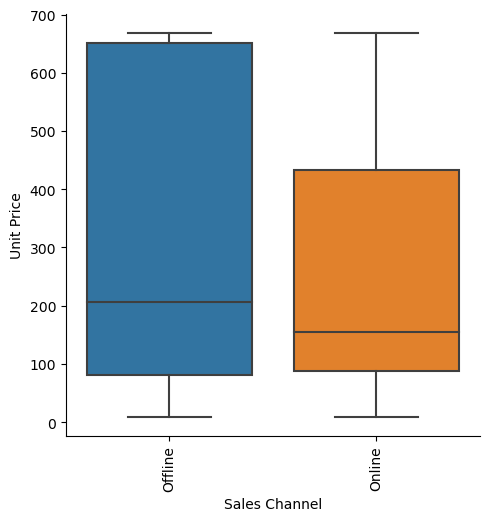

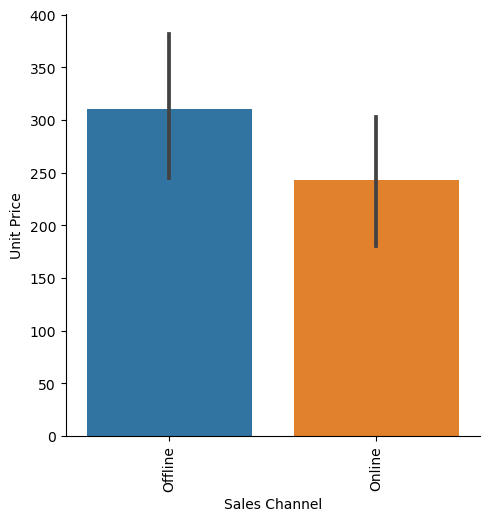

In [86]:
x=sns.catplot(data=df,x='Sales Channel',y='Unit Price',kind='box')
y=sns.catplot(data=df,x='Sales Channel',y='Unit Price',kind='bar')
x.set_xticklabels(rotation=90)
y.set_xticklabels(rotation=90)

### sales channel vs unit cost

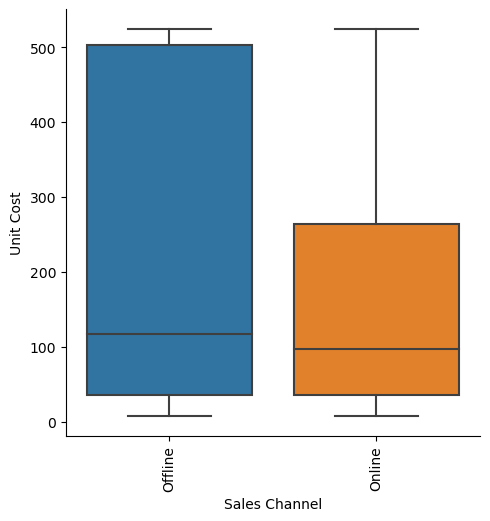

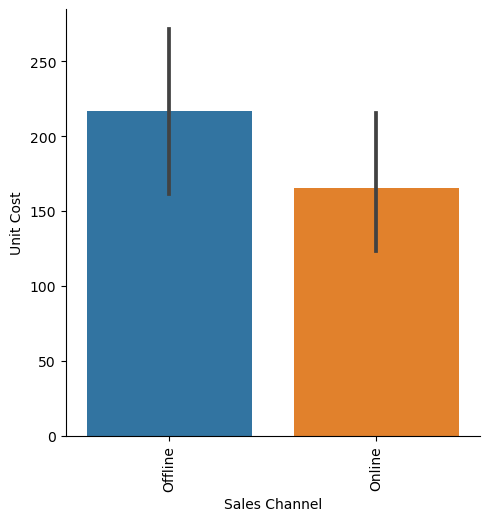

In [87]:
x=sns.catplot(data=df,x='Sales Channel',y='Unit Cost',kind='box')
y=sns.catplot(data=df,x='Sales Channel',y='Unit Cost',kind='bar')
x.set_xticklabels(rotation=90)
y.set_xticklabels(rotation=90)

### sales channel vs total revenue

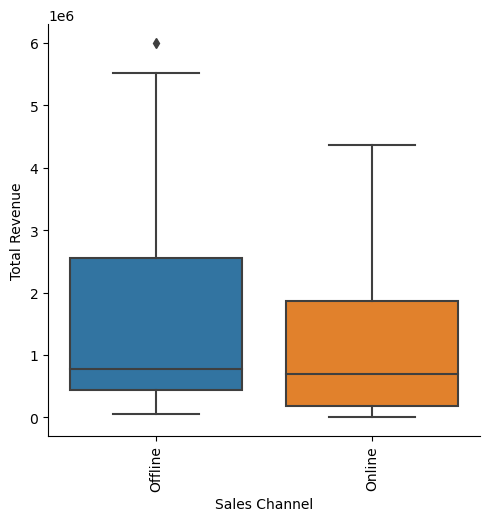

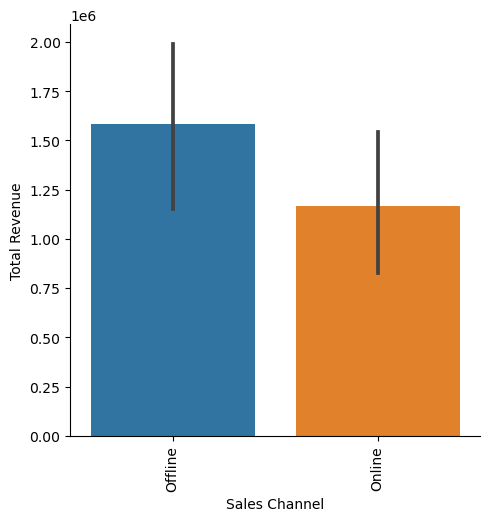

In [88]:
x=sns.catplot(data=df,x='Sales Channel',y='Total Revenue',kind='box')
y=sns.catplot(data=df,x='Sales Channel',y='Total Revenue',kind='bar')
x.set_xticklabels(rotation=90)
y.set_xticklabels(rotation=90)

### sales channel vs total cost

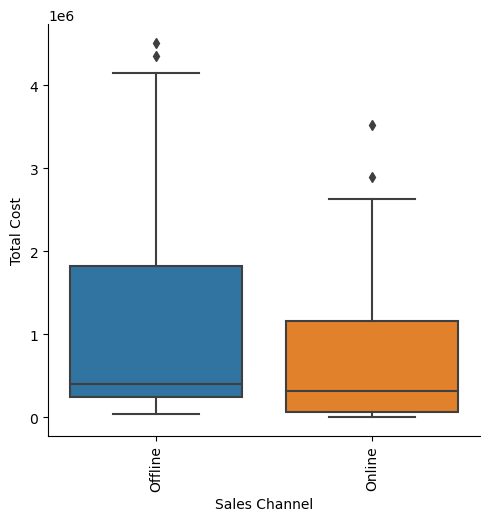

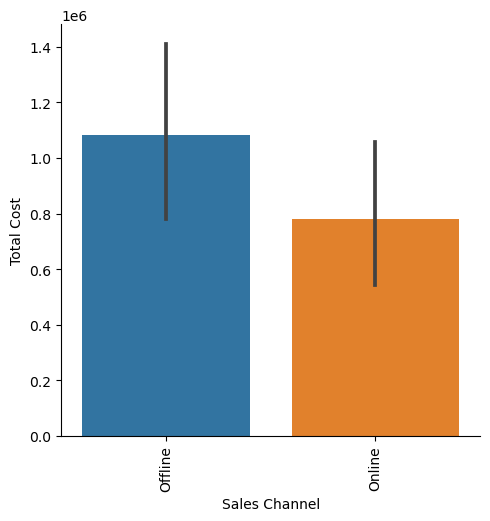

In [89]:
x=sns.catplot(data=df,x='Sales Channel',y='Total Cost',kind='box')
y=sns.catplot(data=df,x='Sales Channel',y='Total Cost',kind='bar')
x.set_xticklabels(rotation=90)
y.set_xticklabels(rotation=90)

### sales channel vs total profit

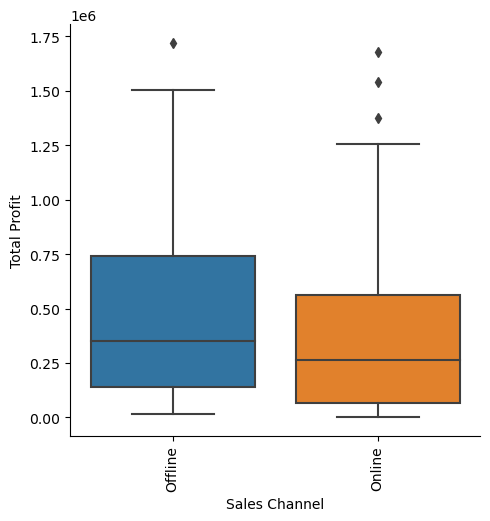

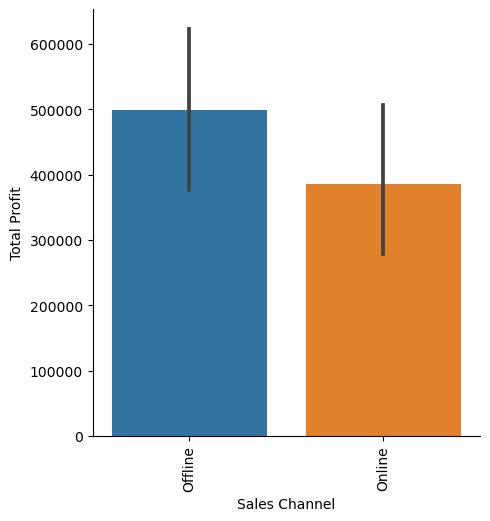

In [90]:
x=sns.catplot(data=df,x='Sales Channel',y='Total Profit',kind='box')
y=sns.catplot(data=df,x='Sales Channel',y='Total Profit',kind='bar')
x.set_xticklabels(rotation=90)
y.set_xticklabels(rotation=90)

### order priority vs units sold

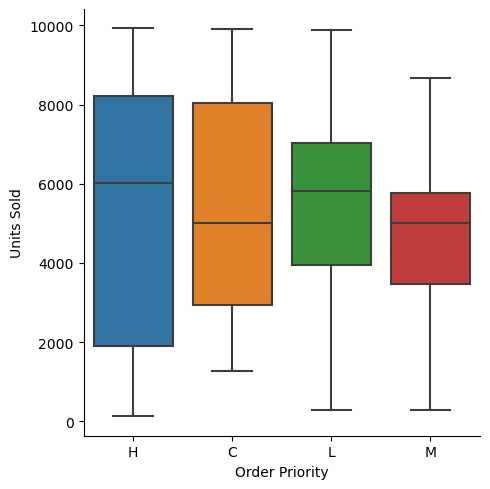

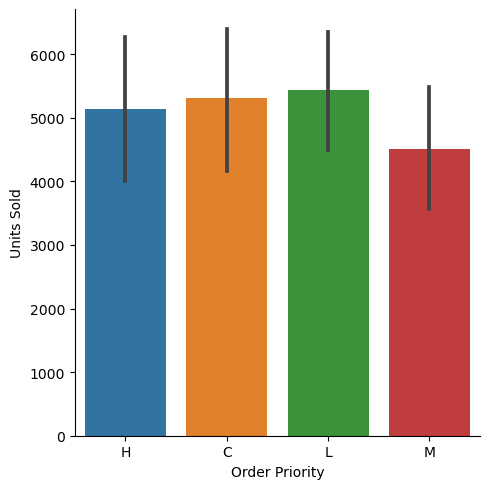

In [91]:
sns.catplot(data=df,x='Order Priority',y='Units Sold',kind='box')
sns.catplot(data=df,x='Order Priority',y='Units Sold',kind='bar')

### order priority vs unit price

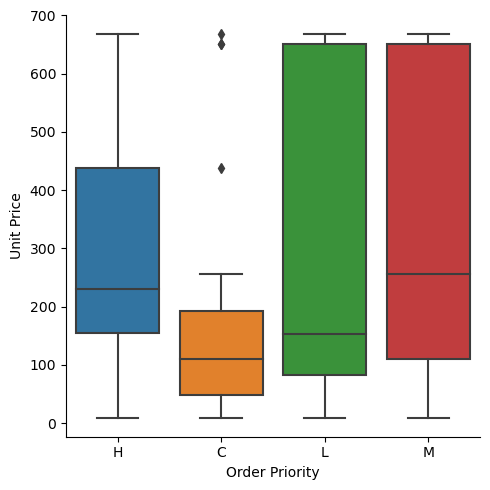

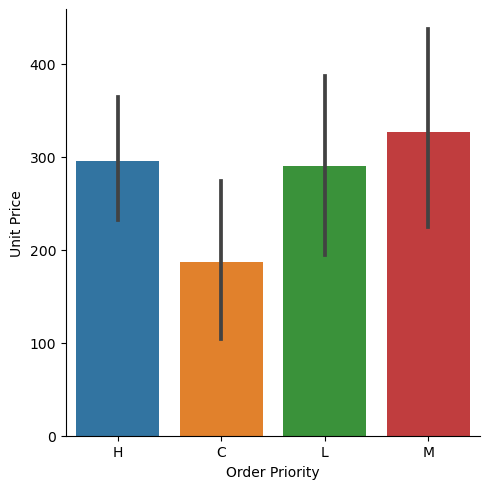

In [92]:
sns.catplot(data=df,x='Order Priority',y='Unit Price',kind='box')
sns.catplot(data=df,x='Order Priority',y='Unit Price',kind='bar')

### order priority vs units cost

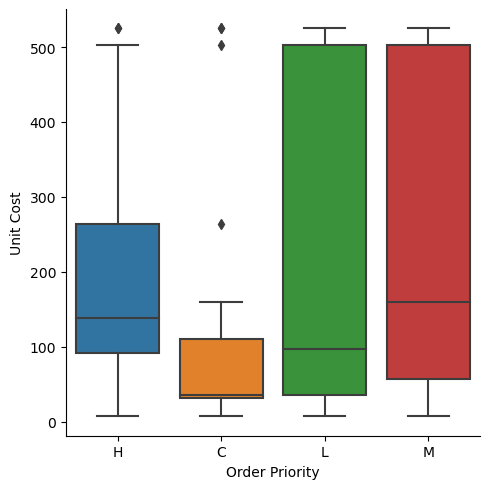

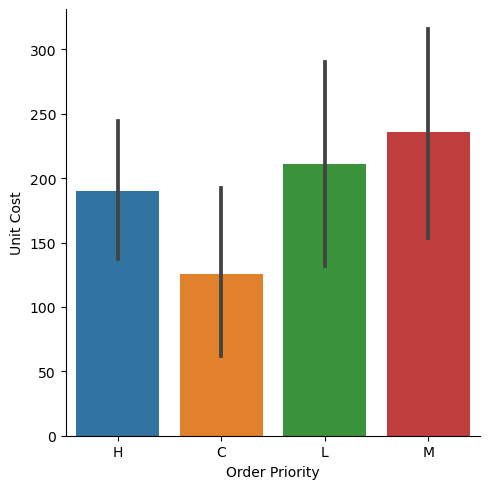

In [93]:
sns.catplot(data=df,x='Order Priority',y='Unit Cost',kind='box')
sns.catplot(data=df,x='Order Priority',y='Unit Cost',kind='bar')

### order priority vs total revenue

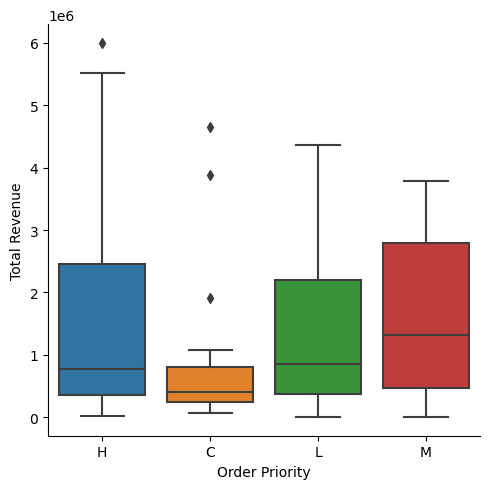

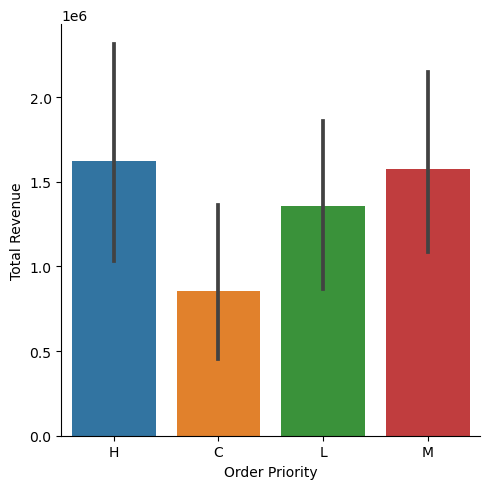

In [94]:
sns.catplot(data=df,x='Order Priority',y='Total Revenue',kind='box')
sns.catplot(data=df,x='Order Priority',y='Total Revenue',kind='bar')

### order priority vs total cost

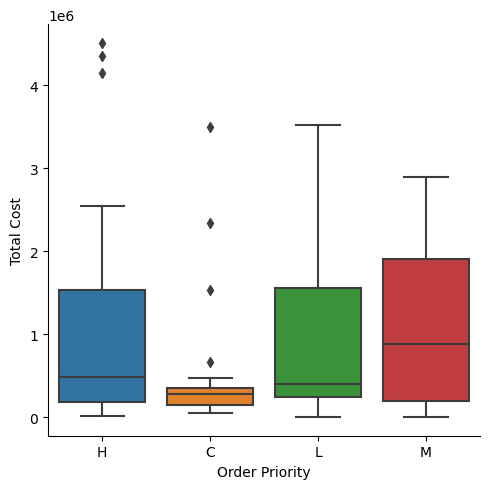

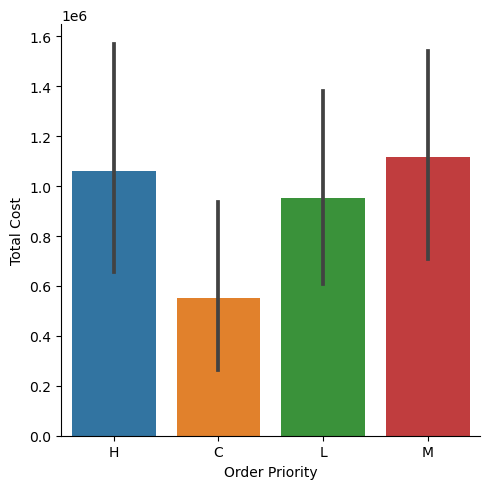

In [95]:
sns.catplot(data=df,x='Order Priority',y='Total Cost',kind='box')
sns.catplot(data=df,x='Order Priority',y='Total Cost',kind='bar')

### order priority vs total profit

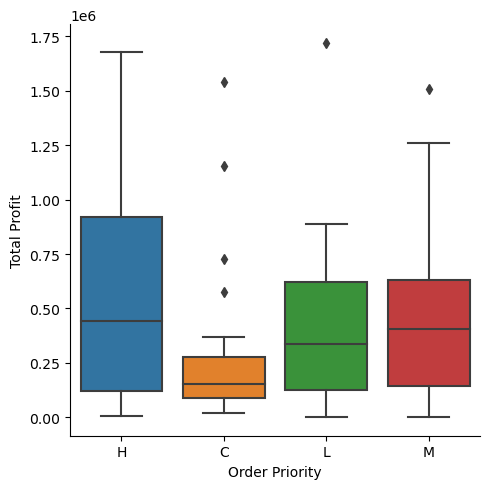

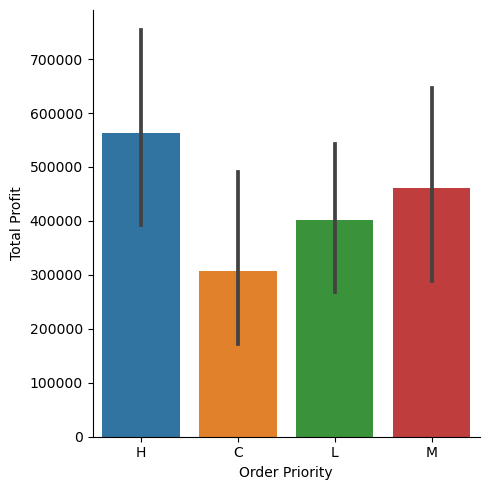

In [96]:
sns.catplot(data=df,x='Order Priority',y='Total Profit',kind='box')
sns.catplot(data=df,x='Order Priority',y='Total Profit',kind='bar')